In [1]:
import pandas as pd
import numpy as np 

In [2]:
pip install xlrd 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_excel('datasets/Canada.xlsx',
                  engine = 'openpyxl',
                  sheet_name = 'Canada by Citizenship',
                  skiprows = range(20),
                  skipfooter = 2
                  )
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
df.drop(['Type', 'Coverage', 'AREA', 'REG', 'DEV',],
        axis = 1, 
        inplace = True,
       )
df.columns

Index([  'OdName', 'AreaName',  'RegName',  'DevName',       1980,       1981,
             1982,       1983,       1984,       1985,       1986,       1987,
             1988,       1989,       1990,       1991,       1992,       1993,
             1994,       1995,       1996,       1997,       1998,       1999,
             2000,       2001,       2002,       2003,       2004,       2005,
             2006,       2007,       2008,       2009,       2010,       2011,
             2012,       2013],
      dtype='object')

In [6]:
df.rename(columns = {'OdName':'Country','AreaName':'Continent','RegName':'Region'},
         inplace = True
         )

In [7]:
df.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [8]:
###My variable of interest
#'Country' - It represents the origin of the people 
#'Continent' - ....
#'Region' - 
#'1980-2013' - 

In [9]:
df.columns = list(map(str, df.columns))
df.columns

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013'],
      dtype='object')

In [10]:
df.set_index('Country', inplace = True)
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [11]:
df['Total'] = df.iloc[:,
                      3:].sum(axis=1)
df.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


In [13]:
df.iloc[:,2]

Country
Afghanistan       Developing regions
Albania            Developed regions
Algeria           Developing regions
American Samoa    Developing regions
Andorra            Developed regions
                         ...        
Viet Nam          Developing regions
Western Sahara    Developing regions
Yemen             Developing regions
Zambia            Developing regions
Zimbabwe          Developing regions
Name: DevName, Length: 195, dtype: object

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [19]:
mpl.style.use('bmh')

In [15]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


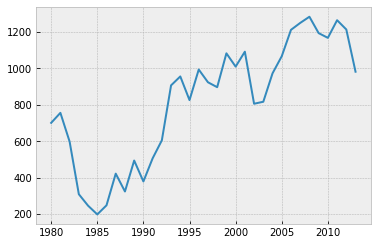

In [26]:
j_data = df.loc['Japan','1980':'2013']
j_data.plot()

In [22]:
ic = df.loc[['India','China'],'1980':'2013']
nic = ic.transpose()

Text(0.5, 1.0, 'Immigration to Canada from India and China during 1980-2013')

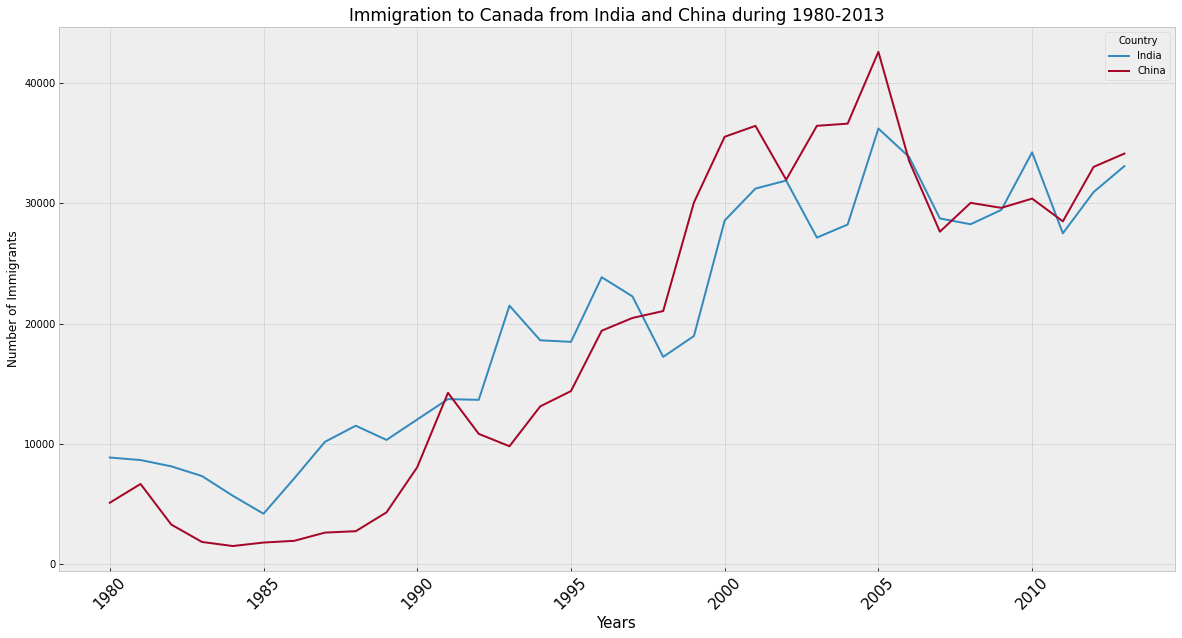

In [30]:
nic.plot(figsize= (20,10))
plt.xlabel('Years', fontsize= 15)
plt.xticks(fontsize=15, rotation=45)
plt.ylabel('Number of Immigrants', fontsize=12)
plt.yticks(fontsize=10)
plt.title('Immigration to Canada from India and China during 1980-2013', fontsize=17)

In [31]:
###Conclusion
#We see a similar pattern of immigration from India and China to Canada from 1980 to 2013

In [32]:
#Compare immigration from top 5 contries 

In [35]:
top5 = df.sort_values(['Total'], ascending = False, axis = 0)
top5.head(8)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358


In [ ]:
df.drop